## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

## 1. 調整參數

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [110]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# 建立模型，使用不同參數
clf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=3)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [111]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9736842105263158


In [112]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.09676612 0.0278597  0.45095568 0.4244185 ]


## 2. Wine datasets

In [113]:
# 讀取 Wine 資料集
wine = datasets.load_wine()

# 切分訓練和測試集
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine.data, wine.target, test_size=0.25)

# 建立模型
clf2 = RandomForestClassifier(n_estimators=20, max_depth=4)

# 訓練模型
clf2.fit(X_train2, y_train2)

# 預測測試集
y_pred2 = clf2.predict(X_test2)

In [114]:
acc2 = metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy: ", acc2)

Accuracy:  1.0


In [115]:
print(wine.feature_names)
print(clf2.feature_importances_)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0.182101   0.00778273 0.00444926 0.01466389 0.02704146 0.08957426
 0.13571542 0.00368588 0.04259039 0.14237677 0.08305498 0.06343494
 0.20352903]


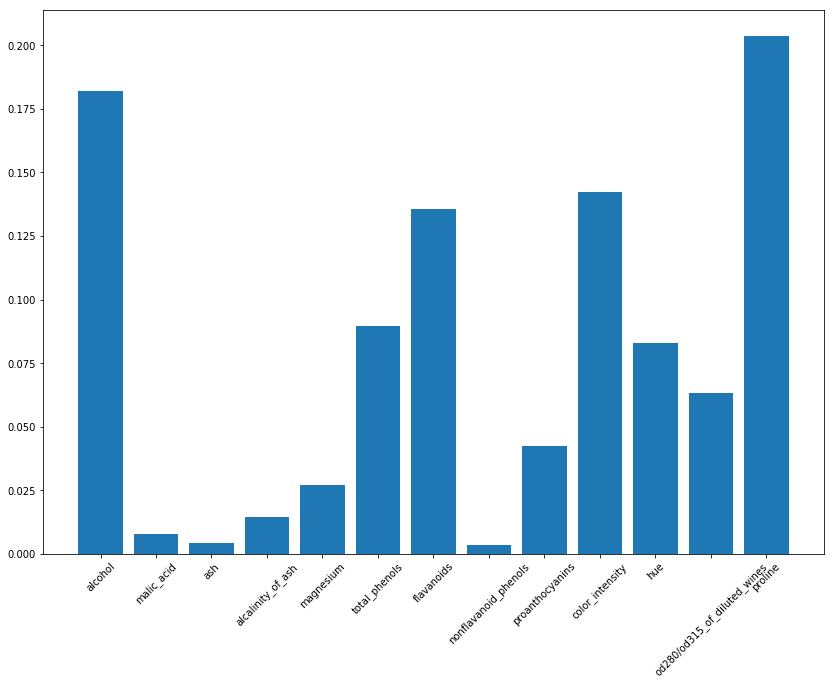

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 10))
plt.bar(wine.feature_names, clf2.feature_importances_)
plt.xticks(rotation=45)
plt.show()